In [1]:
import numpy as np
from bound_rewards_l import *
from lava_problem import main as lava_problem
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import cvxpy as cvx

In [2]:
# Setups for lava problem
p_correct_vals = np.linspace(0.01, 0.99, 20) 
reward_xs = np.array([0.1]) 
reward_x = reward_xs[0]

# Function
def bounds(svec, p_correct = p_correct_vals[0]):
		nx, nu, ny, T, p0, px_x, py_x, R, R0_expected = lava_problem(['--p_correct', str(p_correct), '--reward_x', str(reward_x)])
		bound_f_inverse = compute_bound(l,n,svec, nx, nu, ny, T, p0, px_x, py_x, R, R0_expected) 
		return bound_f_inverse

# Constraint: from 0 to 2, each slope has to be larger
# So elements in the slope vector need to be in increasing order
def con(svec):
    out = []
    for i in range(len(svec)-1):
        out.append(svec[i+1]-svec[i])
    return out
def con1(svec):
    return l(0,n,svec)-1
cons = [{'type':'ineq','fun': con}]

# Print optimization progress
def callbackF(svec,status):
    print (svec,bounds(svec))

In [3]:
def minimize(p_correct,svec):
	res = optimize.minimize(bounds,svec,method = 'trust-constr', constraints = cons, callback = callbackF, args = (p_correct), options={'disp':True})
	return[res.x, res.fun]

In [8]:
n = 2
s0 = [-1,-1,1,1]

In [ ]:
from dask.distributed import Client, progress
client = Client(n_workers=2)
client

In [ ]:
tr = 20
opt_results = []
s0_guesses = [s0]
opt_results.append(minimize(p_correct_vals[0],s0)) # first iteration
s0_guesses.append(opt_results[0][0])

futures = []
for i in range(1,tr):
    future = client.submit(minimize,p_correct_vals[i],s0_guesses[-1])
    futures.append(future)



In [16]:
opt_result = client.gather(futures)

[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075


/Users/dell/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/_hessian_update_strategy.py:186: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


[-1.08801868 -0.93593513  0.68403704  1.34200948] 4.061015694862722
[-1.08801861 -0.93593504  0.68403702  1.34200947] 4.061015696158953
[-1.08801868 -0.93593512  0.68403711  1.3420095 ] 4.0610156947968195
[-1.07865427 -0.92331451  0.6700184   1.33404278] 4.061319433115743
[-1.10387631 -0.93575702  0.71764677  1.32407939] 4.061671412547125
[-1.08801857 -0.93593501  0.68403704  1.3420095 ] 4.061015696224155
[-1.08801861 -0.93593504  0.68403702  1.34200947][-1.08801868 -0.93593513  0.68403704  1.34200948] 4.061015694862722
 4.061015696158953
[-1.0880187  -0.93593516  0.6840371   1.34200952] 4.061015693838507
[-1.08801866 -0.9359351   0.68403707  1.3420095 ] 4.061015694888448
[-1.08801868 -0.93593512  0.68403711  1.3420095 ] 4.0610156947968195
[-1.08801868 -0.93593513  0.68403704  1.34200948] 4.061015694862722
[-1.07865427 -0.92331451  0.6700184   1.33404278] 4.061319433115743
[-1.0880187  -0.93593516  0.6840371   1.34200952] 4.061015693838507
[-1.08801861 -0.93593504  0.68403702  1.342009

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


[-1.08745706 -1.06970371  0.94893004  1.20517733] 4.053863199793187
[-1.08745706 -1.06970371  0.94893004  1.20517733] 4.053863199793187


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


[-1.697183   -0.55221065  0.85427614  1.39721036] 4.111882328694311


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


[-1.09477257 -0.92774598  0.70362155  1.32087504] 4.061730565333946
[-1.08801904 -0.93593489  0.68403702  1.34200957] 4.061015726867985


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


[-1.09477257 -0.92774598  0.70362155  1.32087504] 4.061730565333946
[-1.45668512 -0.72286046  0.83045501  1.35118272] 4.0928370190833006
[-1.08801876 -0.93593491  0.68403701  1.34200947] 4.061015711709457


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887
[-1.09477257 -0.92774598  0.70362155  1.32087504] 4.061730565333946
[-1.11668631 -1.10956268  1.07305566  1.14738371] 4.053398256188376
[-2.43765039  0.17112211  1.01997796  1.24864076] 4.151796947979654


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


[-1.11668631 -1.10956268  1.07305566  1.14738371] 4.053398256188376
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-2.43765039  0.17112211  1.01997796  1.24864076] 4.151796947979654


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


[-1.97768336 -0.31360878  1.03312954  1.26026382] 4.125492941388017


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


[-1.19831965 -1.01334337  1.00789149  1.20695072][-1.97768336 -0.31360878  1.03312954  1.26026382] 4.125492941388017
 4.060816981645289


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)


[-1.12361766 -1.12311806  1.10804516  1.13194167] 4.053142717100499


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


[-3.14278272  0.92162024  1.07671567  1.14653968] 4.1787723375875085


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


[-1.08801904 -0.93593489  0.68403702  1.34200957] 4.061015726867985
[-3.14278272  0.92162024  1.07671567  1.14653968] 4.1787723375875085


distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


[-1.08801876 -0.93593491  0.68403701  1.34200947] 4.061015711709457
[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


[-1.26066842 -1.01281849  1.11124058  1.17291762] 4.062932868794477
[-2.76181838  0.51618496  1.09064433  1.15708807] 4.164290127445392


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.26066842 -1.01281849  1.11124058  1.17291762] 4.062932868794477


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


[-1.12628569 -1.12569672  1.11723508  1.12783873] 4.053145967491085


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


[-1.12628569 -1.12569672  1.11723508  1.12783873] 4.053145967491085
[-3.2854178   1.07058644  1.10264598  1.11426934] 4.183017230732234


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


[-3.2854178   1.07058644  1.10264598  1.11426934] 4.183017230732234
[-1.09541812 -0.9426073   0.6907094   1.3509638 ] 4.060988647855262


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


[-3.12601656  1.02062238  1.02349468  1.08399906] 4.183482464246498


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.08801904 -0.93593489  0.68403702  1.34200957] 4.061015726867985
[-1.29855194 -1.00048031  1.14795559  1.16197471] 4.0647866090608336
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


[-1.29855194 -1.00048031  1.14795559  1.16197471] 4.0647866090608336
[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.12800127 -1.12778513  1.12350968  1.12523733] 4.053131964394963


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


[-3.31635393  1.10195544  1.10650508  1.1098266 ] 4.183901180475144
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.12800127 -1.12778513  1.12350968  1.12523733] 4.053131964394963
[-1.12564318 -0.97271179  0.72081389  1.39136397] 4.0607150214092
[-3.31635393  1.10195544  1.10650508  1.1098266 ] 4.183901180475144
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-3.18672179  1.03731173  1.06207669  1.08768702] 4.183098620723935
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


[-3.18672179  1.03731173  1.06207669  1.08768702] 4.183098620723935


distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.32492279 -0.98191808  1.15765359  1.16117361] 4.066600318389512
[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.32492279 -0.98191808  1.15765359  1.16117361] 4.066600318389512


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.12812173 -1.12810645  1.12409602  1.12507172] 4.053124464056511
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-3.32097253  1.10594668  1.10841644  1.10867226] 4.183986360101582


distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


[-1.08801904 -0.93593489  0.68403702  1.34200957] 4.061015726867985


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289


distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-3.5713975   1.18142454  1.19032906  1.20001975] 4.1837477923576865
[-3.5713975   1.18142454  1.19032906  1.20001975] 4.1837477923576865


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


[-1.32902242 -0.97968013  1.16005241  1.16071946] 4.066848285370237
[-1.32902242 -0.97968013  1.16005241  1.16071946] 4.066848285370237
[-1.12825205 -1.12823246  1.12451766  1.12489931] 4.053124624878908


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


[-3.32284167  1.10752788  1.10854126  1.10887205] 4.184028848639273
[-1.08412515 -0.92958708  0.67657284  1.3677906 ] 4.061212023894136
[-1.12825205 -1.12823246  1.12451766  1.12489931] 4.053124624878908
[-1.08801863 -0.93593507  0.68403705  1.34200958][-3.32284167  1.10752788  1.10854126  1.10887205] 4.061015695486289
 4.184028848639273


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887
[-3.9129652   1.30168774  1.30436854  1.30710717] 4.183976217600808


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-1.3304266  -0.97899128  1.16069103  1.1608251 ] 4.066930836849481


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


[-1.3304266  -0.97899128  1.16069103  1.1608251 ] 4.066930836849481


distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


[-1.08412515 -0.92958708  0.67657284  1.3677906 ] 4.0612120238958065
[-3.32441639  1.10868203  1.10886786  1.10900556] 4.184054785425479
[-1.12832185 -1.1283131   1.12474753  1.12481592] 4.05312422026253
[-3.32441639  1.10868203  1.10886786  1.10900556] 4.184054785425479


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


[-1.12832185 -1.1283131   1.12474753  1.12481592] 4.05312422026253
[-4.08783438  1.36112637  1.36244676  1.36387843] 4.18402067398651


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


[-4.08783438  1.36112637  1.36244676  1.36387843] 4.18402067398651
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.33070778 -0.97885327  1.16081911  1.160846  ] 4.066947369999842


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887
[-1.33070778 -0.97885327  1.16081911  1.160846  ] 4.066947369999842
[-3.3248115   1.10891549  1.10901758  1.10902741] 4.184058241448275
[-1.12832824 -1.12832763  1.12477224  1.12481175] 4.053123916542423
`gtol` termination condition is satisfied.
Number of iterations: 26, function evaluations: 85, CG iterations: 44, optimality: 8.91e-09, constraint violation: 0.00e+00, execution time: 7.1e+03 s.


distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-4.4172092   1.47158954  1.47201334  1.47245203] 4.184049372845792
[-1.08412515 -0.92958708  0.67657284  1.3677906 ] 4.0612120238958065


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


[-4.4172092   1.47158954  1.47201334  1.47245203] 4.184049372845792
[-1.33076437 -0.97882542  1.160845    1.16085038] 4.066950700433927


distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


[-3.32497378  1.10901096  1.10905116  1.10906388] 4.184060047079624
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.33076437 -0.97882542  1.160845    1.16085038] 4.066950700433927
[-3.32497378  1.10901096  1.10905116  1.10906388] 4.184060047079624
[-1.0712188  -0.91581585  0.67493665  1.37481329] 4.061336066221361


distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-4.75640803  1.58466111  1.58476616  1.58488597] 4.184058519133756
[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318
[-1.33077533 -0.97882011  1.16084988  1.16085096] 4.06695134207417
[-3.32512097  1.10908518  1.10909253  1.10909816] 4.184061071533382
[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


[-1.33077533 -0.97882011  1.16084988  1.16085096] 4.06695134207417
`gtol` termination condition is satisfied.
Number of iterations: 21, function evaluations: 55, CG iterations: 32, optimality: 3.99e-09, constraint violation: 0.00e+00, execution time: 7e+03 s.
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-3.32512097  1.10908518  1.10909253  1.10909816] 4.184061071533382
[-1.07121893 -0.91581599  0.67493667  1.37481322] 4.061336065337263
[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318
[-7.25888124  2.41866236  2.4187605   2.4188711 ] 4.184059614781127
[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)


[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318
[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318
[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318
[-3.32516875  1.10910527  1.10910944  1.10910983] 4.184061205886728
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887
[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-1.08781251 -0.93644074  0.68457276  1.3439215 ] 4.060973713453318
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-1.07121893 -0.91581599  0.67493667  1.37481322] 4.061336065337263
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-1.15323964 -0.93612536  0.69181686  1.39907883] 4.064335060694364
[-4.3632893   1.52973892  1.52974309  1.52974348] 4.1840612370741725
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-1.15323964 -0.93612536  0.69181686  1.39907883] 4.064335060694364
[-7.25888124  2.41866236  2.4187605   2.4188711 ] 4.184059614781127


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-1.15323964 -0.93612536  0.69181686  1.39907883] 4.064335060694364
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027
[-1.08781257 -0.93644068  0.68457274  1.34392147] 4.060973720288791


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.24425757 -0.95759721  0.94532242  1.29260883] 4.065787244055558
[-1.24425757 -0.95759721  0.94532242  1.29260883] 4.065787244055558
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


[-1.07121893 -0.91581599  0.67493667  1.37481322] 4.061336065337263


distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-4.3632893   1.52973892  1.52974309  1.52974348] 4.1840612370741725
[-7.25888124  2.41866236  2.4187605   2.4188711 ] 4.184059614781127


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.08781257 -0.93644068  0.68457274  1.34392147] 4.060973720288791
[-1.29097525 -0.96619943  1.12310114  1.23265912] 4.066191143545628
[-1.18994737 -1.03399309  0.7820952   1.47360324] 4.060342639806027


distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887
[-1.29097525 -0.96619943  1.12310114  1.23265912] 4.066191143545628
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-4.25809498  1.40932944  1.4093336   1.409334  ] 4.184061233300717
[-7.25888124  2.41866235  2.41876049  2.41887109] 4.184059614781125


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


[-7.25888124  2.41866235  2.41876049  2.41887109] 4.184059614781125
[-1.07121893 -0.91581599  0.67493667  1.37481322] 4.061336065337263


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


[-1.08781261 -0.93644072  0.68457273  1.34392151] 4.060973720311728
`gtol` termination condition is satisfied.
Number of iterations: 15, function evaluations: 30, CG iterations: 9, optimality: 4.99e-09, constraint violation: 0.00e+00, execution time: 1.2e+02 s.


distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


[-1.18994735 -1.03399307  0.7820952   1.47360323] 4.060342639842852
[-1.3029038  -0.96190649  1.19091447  1.21264111] 4.066438994984356
[-1.3029038  -0.96190649  1.19091447  1.21264111] 4.066438994984356
[-4.25809474  1.40932976  1.40933132  1.40933195] 4.18406129206143


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


[-4.25809474  1.40932976  1.40933132  1.40933195] 4.18406129206143
[-7.2588184   2.41872032  2.41874141  2.4187591 ] 4.184060984157281
[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887


distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


[-1.0130594  -1.01305833  0.73804023  1.29017034] 4.0531239449488075
[-1.18994735 -1.03399307  0.7820952   1.47360323] 4.060342639842852
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.32044575 -0.95075313  1.20720767  1.21082692] 4.067525093280443
[-1.32044575 -0.95075313  1.20720767  1.21082692] 4.067525093280443


distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


[-1.07121893 -0.91581599  0.67493667  1.37481322] 4.061336065337263
[-4.25815842  1.40934439  1.40934488  1.40934509] 4.184061319255061
[-7.2588184   2.41872032  2.41874142  2.4187591 ] 4.184060984157281
[-7.2588184   2.41872032  2.41874142  2.4187591 ] 4.184060984157281
[-1.10353921 -0.93529751  0.71721622  1.32371336] 4.061682242956596
[-1.32643847 -0.94709832  1.21058567  1.21124453] 4.0679028039464535
[-1.32643847 -0.94709832  1.21058567  1.21124453] 4.0679028039464535
[-4.49408736  1.4625759   1.46257639  1.46257661] 4.184061319860831
[-1.08801902 -0.93593481  0.68403619  1.34200974] 4.061015734410887
[-7.25878926  2.41872032  2.4187226   2.41872861] 4.184061279853395
[-1.18994735 -1.03399307  0.7820952   1.47360323] 4.060342639842852
[-1.08801863 -0.93593507  0.68403705  1.34200958] 4.061015695486289
[-1.20751051 -0.89718922  0.66872065  1.4380718 ] 4.0697827908255935


distributed.worker - WARNING -  Compute Failed
Function:  minimize
args:      (0.6289473684210526, array([-1.0130594 , -1.01305833,  0.73804023,  1.29017034]))
kwargs:    {}
Exception: SolverError("Solver 'MOSEK' failed. Try another solver, or solve with verbose=True for more information.")



SolverError: Solver 'MOSEK' failed. Try another solver, or solve with verbose=True for more information.

In [19]:
# bounds([-1.0130594 , -1.01305833,  0.73804023,  1.29017034], 0.6289473684210526)
bounds([-1,-1,1,1], 0.6289473684210526)

4.277136603596268

In [18]:
client.close()

In [25]:
minimize(0.6289473684210526,[-1.18994735, -1.03399307,  0.7820952,   1.47360323])

KeyboardInterrupt: 

In [27]:

bounds([-3.53,1.18,1.18,1.18],0.6289473684210526)

4.161923218256493

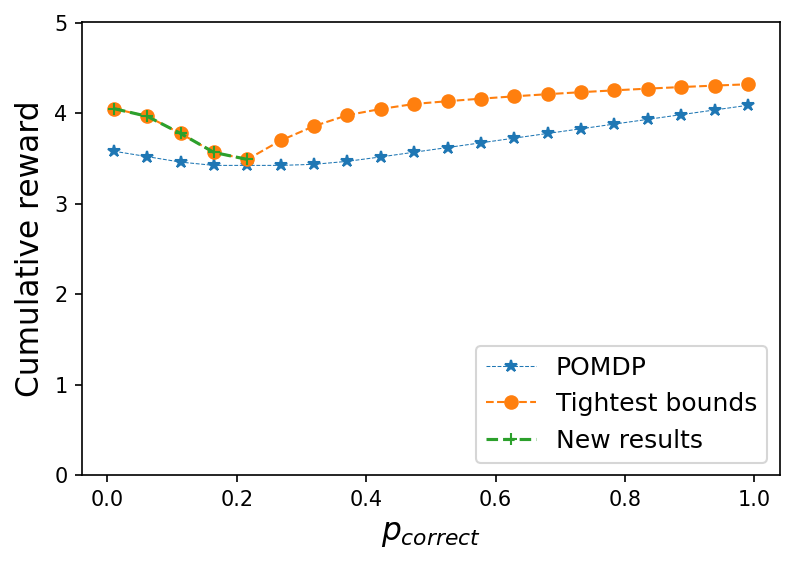

In [45]:
# Plot POMDP v picked tightest bounds
opt_data = np.load("results/lava_problem_optimal_results.npz")
p_correct_vals = opt_data['p_correct_vals']
opt_values = opt_data['opt_values']

# Plot
fig, ax = plt.subplots()
ax.plot(p_correct_vals, opt_values, '*--', label='POMDP', linewidth=0.5)

data = np.load("tightest_bounds.npz")
bounds = data['bounds']
ax.plot(p_correct_vals, bounds, 'o--', label='Tightest bounds', linewidth=1) 

ax.plot(p_correct_vals[0:5],[4.0531239449,3.9676793198,3.777793097,3.5682540424,3.4912805122],'+--',label='New results')

plt.xlabel('$p_{correct}$', fontsize=15)
plt.ylabel('Cumulative reward', fontsize=15)
plt.legend(fontsize=12, loc='lower right')
plt.ylim([0, 5.01])
plt.gcf().set_dpi(150)
plt.show() 